Sure! Here's the **dataset information** for the **Algerian Forest Fires Cleaned Dataset**:

---

## 📚 **Algerian Forest Fires Cleaned Dataset – Information**

### 🗂️ Total Instances:

* **244 records**

  * **122 from Bejaia region**
  * **122 from Sidi-Bel Abbes region**

### 🧪 **Features (Inputs):**

| Feature       | Description                                                | Type        |
| ------------- | ---------------------------------------------------------- | ----------- |
| `Date`        | Date of observation (format: DD/MM/YYYY)                   | Date        |
| `Temperature` | Temperature in Celsius                                     | Numeric     |
| `RH`          | Relative Humidity (%)                                      | Numeric     |
| `Ws`          | Wind Speed (km/h)                                          | Numeric     |
| `Rain`        | Rainfall (mm)                                              | Numeric     |
| `FFMC`        | Fine Fuel Moisture Code (fire index)                       | Numeric     |
| `DMC`         | Duff Moisture Code (fire index)                            | Numeric     |
| `DC`          | Drought Code (fire index)                                  | Numeric     |
| `ISI`         | Initial Spread Index                                       | Numeric     |
| `BUI`         | Buildup Index (optional, not always present)               | Numeric     |
| `FWI`         | Fire Weather Index (optional)                              | Numeric     |
| `Region`      | Region of data collection (1 = Bejaia, 2 = Sidi-Bel Abbes) | Categorical |
| `Classes`     | **Target Variable**: "fire" or "not fire"                  | Categorical |

---

### 🏷️ **Target Variable:**

* **`Classes`**: Binary classification

  * `fire`
  * `not fire`

---

### 🧼 Notes on the Cleaned Dataset:

* All **missing values** have been handled.
* **Dates parsed** and made usable for time-series analysis if needed.
* `Region` is encoded for binary or multiclass ML tasks.
* Values standardized or normalized if needed for modeling.

---



In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [5]:
dataset = pd.read_csv('Algerian_forest_fires_dataset.csv')
display(dataset)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [9]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [13]:
isnull = dataset.isnull().any(axis=1)
dataset[isnull]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [15]:
dataset.loc[:122 , 'Region'] = 0  # index 0 to 121 → Bejaia → Region = 0
dataset.loc[122: , 'Region'] = 1  # index 122 onward → Sidi-Bel Abbes → Region = 1
df = dataset


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [19]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [21]:
df[['Region']] = df[['Region']].astype(int) # changing the datatype of Region float to int 

In [23]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [25]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [84]:
# সব null (missing) ভ্যালু সহ সারিগুলো ডেটাসেট থেকে মুছে ফেলা হলো এবং ইনডেক্স রিসেট করা হলো
df = df.dropna().reset_index(drop=True)



```python
# সব null (missing) ভ্যালু সহ সারিগুলো ডেটাসেট থেকে মুছে ফেলা হলো এবং ইনডেক্স রিসেট করা হলো
df = df.dropna().reset_index(drop=True)
```

---

### 🔍 ব্যাখ্যা:

* `df.dropna()` → ডেটাসেট থেকে যেসব সারিতে **null (NaN)** মান আছে সেগুলো **drop** বা **মুছে ফেলা** হচ্ছে
* `.reset_index(drop=True)` → ডেটাসেটের ইনডেক্স আবার 0 থেকে শুরু করা হচ্ছে

  * `drop=True` মানে পুরনো ইনডেক্স রাখবে না

---

### ✅ কেন এটা করা হয়?

* Missing values অনেক সময় মডেলিং বা visualizations-এ সমস্যা করে
* যদি missing value খুব বেশি না হয়, তখন সরিয়ে ফেলা একটা ভালো practice
* ইনডেক্স রিসেট না করলে dropped রো-এর জায়গাগুলোতে ইনডেক্সে gap থাকে

---




In [33]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [37]:
# removing 122th row 
df = df.drop(122).reset_index(drop=True)
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [39]:
# Fixing spcaes in columns names 
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [41]:
## Changing the required  columns as integer datatypes
df[['month','day','year','Temperature','RH','Ws']] = df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          242 non-null    int32 
 1   month        242 non-null    int32 
 2   year         242 non-null    int32 
 3   Temperature  242 non-null    int32 
 4   RH           242 non-null    int32 
 5   Ws           242 non-null    int32 
 6   Rain         242 non-null    object
 7   FFMC         242 non-null    object
 8   DMC          242 non-null    object
 9   DC           242 non-null    object
 10  ISI          242 non-null    object
 11  BUI          242 non-null    object
 12  FWI          242 non-null    object
 13  Classes      242 non-null    object
 14  Region       242 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 21.9+ KB


In [55]:
objects = [features for features in df.columns if df[features].dtypes == 'O' ]
objects

['Classes']

In [57]:
# changing datatype to float of all feature where datatype == object
for i in objects:
    if i!='Classes':
        df[i] = df[i].astype(float)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int32  
 1   month        242 non-null    int32  
 2   year         242 non-null    int32  
 3   Temperature  242 non-null    int32  
 4   RH           242 non-null    int32  
 5   Ws           242 non-null    int32  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 21.9+ KB


In [61]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,242.000000,242.000000,242.0,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,15.822314,7.508264,2012.0,32.152893,62.004132,15.508264,0.763223,77.928099,14.730992,49.601240,4.759504,16.747934,7.063636,0.495868
std,8.809501,1.112888,0.0,3.635545,14.847635,2.808171,2.007354,14.316912,12.393811,47.690192,4.154248,14.229690,7.442923,0.501019
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.250000,14.000000,0.000000,72.375000,5.800000,14.325000,1.400000,6.025000,0.725000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.250000,3.500000,12.450000,4.450000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.750000,17.000000,0.500000,88.300000,20.850000,70.050000,7.275000,22.775000,11.525000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [63]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [65]:
## Saving the cleaned dataset
df.to_csv('Algerian_forest_fires_cleaned_dataset1.csv', index = False)

# Exploratory Data Analysis 

In [72]:
# day, month এবং year কলামগুলো ডেটাসেট থেকে মুছে ফেলা হলো (drop করা হলো)
df_copy = df.drop(['day', 'month', 'year'], axis=1)


🔍 ব্যাখ্যা:
df.drop([...], axis=1) → column ডিলেট করার জন্য ব্যবহার হয় (axis=1 মানে কলাম)

['day', 'month', 'year'] → এই তিনটি কলামকে বাদ দেওয়া হচ্ছে

df_copy → মূল df এর একটি নতুন ভার্সন তৈরি করা হচ্ছে, যেটাতে আর day, month, year থাকবে না

In [70]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [75]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [87]:
## Encoding of the categories in Classes
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)


```python
# 'Classes' কলামে 'not fire' থাকলে 0 এবং অন্য যেকোনো কিছু (মানে 'fire') হলে 1 বসানো হলো
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'), 0, 1)
```

---

### 🔍 ব্যাখ্যা:

* `df_copy['Classes']` → মূল টার্গেট কলাম
* `.str.contains('not fire')` → চেক করছে কোন কোন রো-তে `'not fire'` লেখা আছে
* `np.where(...)` → যদি `'not fire'` থাকে, তাহলে `0`, আর না থাকলে `1` (মানে `'fire'`) বসাচ্ছে

---

### ✅ কেন এটা করা হয়?

* মেশিন লার্নিং মডেল কাজ করতে পারে **সংখ্যায়** (numerical data) — string বা ক্যাটেগরিক্যাল ডেটা না
* তাই **Binary Classification** এর জন্য `'not fire'` → 0 এবং `'fire'` → 1 এ রূপান্তর করা হলো

---

### 📌 বাংলায় সহজভাবে:

**"not fire" মানে আগুন লাগেনি → তাই 0**
**"fire" মানে আগুন লেগেছে → তাই 1**

---



In [92]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [94]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
237,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
238,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
239,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
240,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
241,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [96]:
df_copy['Classes'].value_counts()

Classes
1    137
0    105
Name: count, dtype: int64

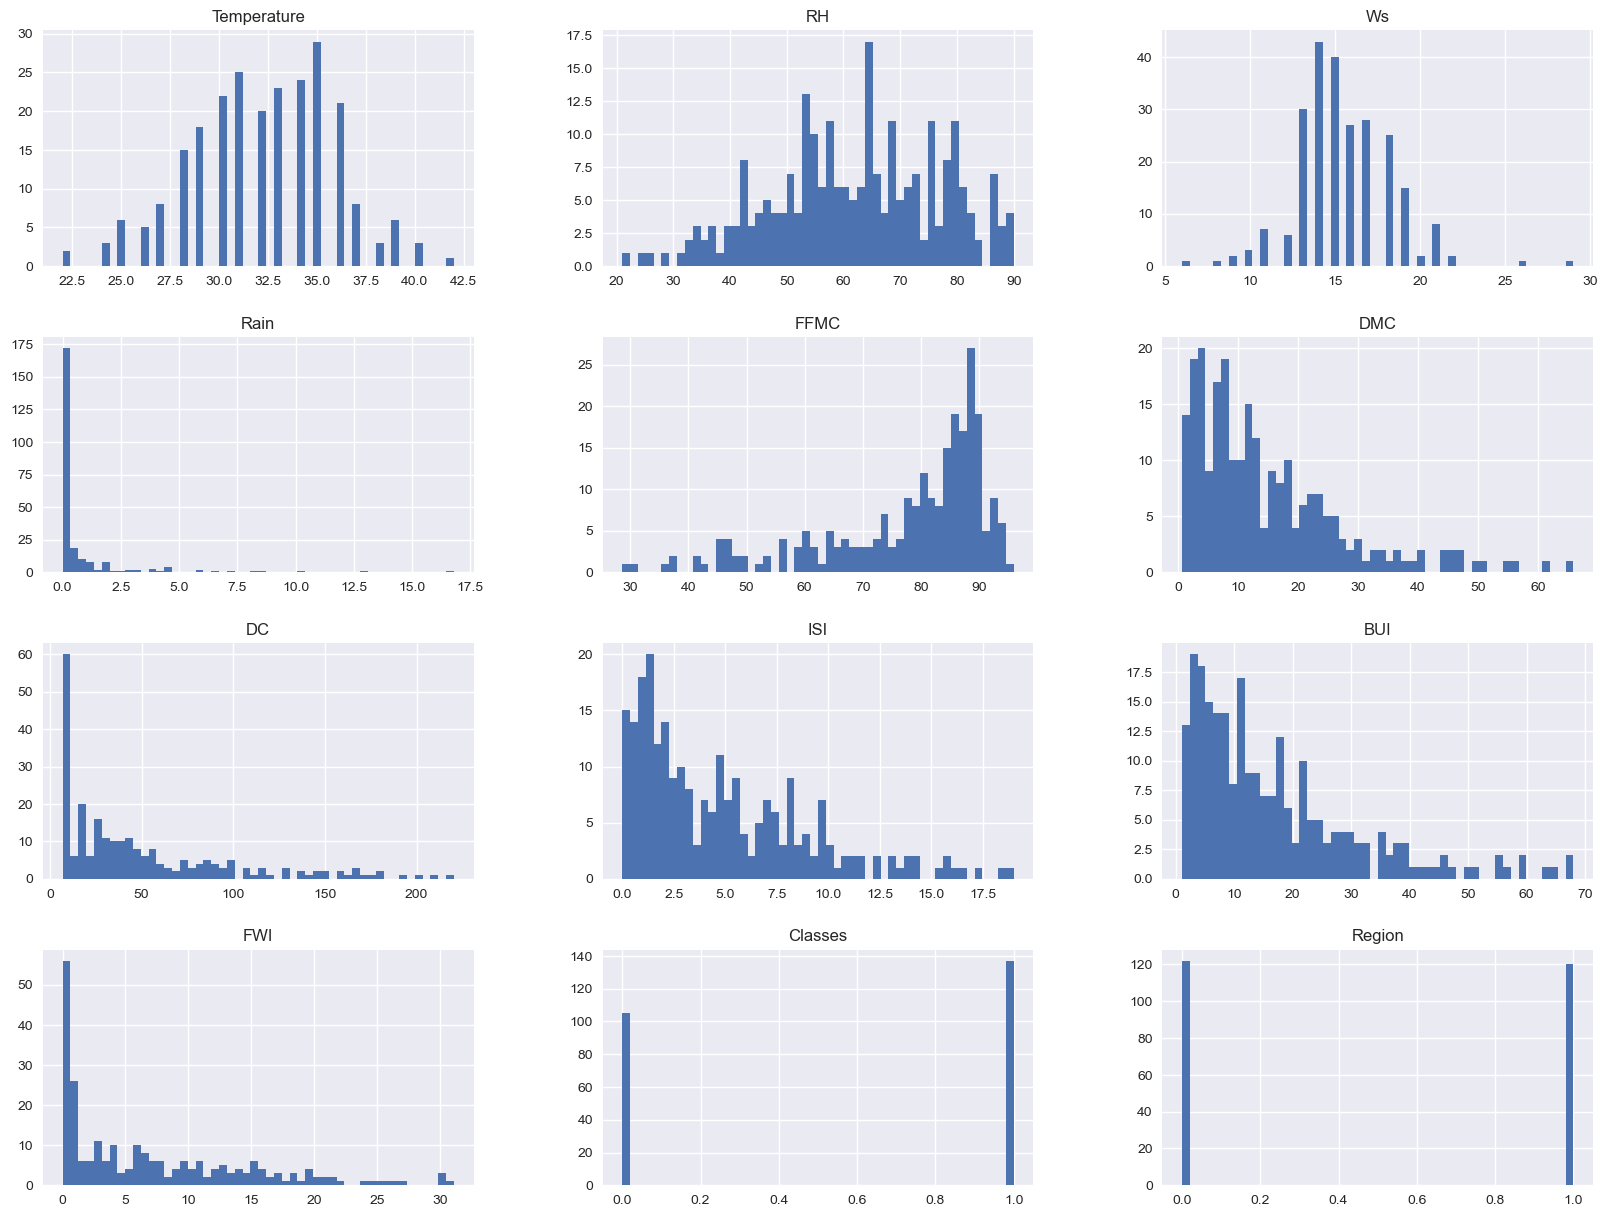

In [104]:
plt.style.use('seaborn-v0_8')           # সুন্দর গ্রাফিক স্টাইল
df_copy.hist(bins=50 , figsize =(20,15)) # সব ফিচারের জন্য 50-বিন Histogram
plt.show()                              # সব প্লট দেখাও



```python
# গ্রাফের জন্য seaborn স্টাইল ব্যবহার করা হলো (দেখতে সুন্দর হয়)
plt.style.use('seaborn-v0_8')

# df_copy ডেটাসেটের সব সংখ্যাসূচক (numeric) ফিচারের জন্য histogram আঁকা হলো
# প্রতিটা ফিচারের জন্য ৫০টি bin ব্যবহার করা হয়েছে এবং পুরো ফিগারটি বড় করে দেখানো হয়েছে (20x15 ইঞ্চি)
df_copy.hist(bins=50, figsize=(20, 15))

# সব গ্রাফ একসাথে দেখানোর জন্য show() ফাংশন ব্যবহার করা হলো
plt.show()
```

---

### 🔍 ব্যাখ্যা:

* `plt.style.use('seaborn')`: গ্রাফে **seaborn-style** ব্যবহার করা হয় যাতে visualization দেখতে আরও সুন্দর হয়
* `df_copy.hist(...)`: সব **numerical column**-এর জন্য histogram অটোমেটিক্যালি তৈরি করে

  * `bins=50`: মানগুলোকে ৫০টি ভাগে ভাগ করা হয়েছে (এই ভাগগুলোকে bin বলে)
  * `figsize=(20,15)`: ছবির আকার বড় করে দেখানো হয়েছে
* `plt.show()`: সব গ্রাফ **display** করার জন্য

---

### 📌 কেন Histogram বা Density Plot দরকার?

* ফিচারের **distribution (বিতরণ)** দেখতে
* দেখতে ফিচারটা **normal** না **skewed**
* কোনো **outlier** আছে কিনা বুঝতে
* পরে **scaling বা transformation** দরকার কিনা সেটা জানার জন্য

---





---


এই কোডের মাধ্যমে ডেটাসেটের **সব সংখ্যাসূচক কলাম (numeric features)** এর জন্য আলাদা আলাদা histogram তৈরি হয়।

---

## 🔍 Histogram ব্যাখ্যা (Feature-wise):

### 1️⃣ **Temperature (Celsius)**

* X-axis: তাপমাত্রা রেঞ্জ (20°C থেকে 45°C)
* Y-axis: প্রতি রেঞ্জে কতগুলো দিন সেই মানে পড়েছে
* যদি 30–35°C রেঞ্জে বার বেশি হয়, বোঝা যাবে বেশিরভাগ দিন ওই রেঞ্জে তাপমাত্রা ছিল।
* যদি বেশি তাপমাত্রার দিকে আগুন বেশি হয়, তাহলে এ থেকে আগুনের সম্পর্ক বোঝা যাবে।

---

### 2️⃣ **RH (Relative Humidity)**

* X-axis: আর্দ্রতা (%)
* Y-axis: কতদিন কত শতাংশ RH ছিল
* যদি গ্রাফ বামদিকে বেশি হয় (RH কম), তাহলে দেখা যাবে আগুন কম আর্দ্রতার সময় বেশি হয়।

---

### 3️⃣ **Ws (Wind Speed)**

* বাতাসের গতি
* দেখা যাবে বেশিরভাগ দিন বাতাসের গতি কোন রেঞ্জে ছিল
* উচ্চ গতি মানে আগুন দ্রুত ছড়ানোর সম্ভাবনা, তাই ডেটা গুরুত্বপূর্ণ।

---

### 4️⃣ **Rain (mm)**

* প্রায়ই histogram-এর বড় অংশ 0mm দেখাবে, কারণ বেশিরভাগ দিন বৃষ্টি হয়নি।
* যদি histogram-এ সব বার 0mm-এর দিকে হয়, বোঝা যাবে dataset-এ আগুন লাগার সময় সাধারণত বৃষ্টি হয়নি।

---

### 5️⃣ **FFMC (Fine Fuel Moisture Code)**

* বেশি মান = শুকনো ছোট পাতা বা ঘাস, যেখানে আগুন সহজে লাগে
* Histogram যদি 85–95 রেঞ্জে বেশি হয়, বুঝা যাবে dataset আগুন-প্রবণ সময়ের

---

### 6️⃣ **DMC (Duff Moisture Code)**

* মাটির মাঝারি স্তরের আর্দ্রতা পরিমাপ করে
* Dry হলে আগুন ধরার সম্ভাবনা বেশি

---

### 7️⃣ **DC (Drought Code)**

* শুষ্কতা মাপার সূচক, মাটি কতটা শুকনো ছিল
* যদি histogram বেশি মানের দিকে হয়, বুঝা যাবে dataset-এ শুষ্কতা বেশি ছিল

---

### 8️⃣ **ISI (Initial Spread Index)**

* আগুন কত তাড়াতাড়ি ছড়ায়, সেটা মাপে
* histogram দেখে বোঝা যাবে ছড়ানোর গতি সাধারণত কত ছিল

---

### 9️⃣ **Region**

* দুটি বার থাকবে: 0 (Bejaia) এবং 1 (Sidi-Bel Abbes)
* কোন অঞ্চলের ডেটা বেশি সেটা বোঝা যাবে

---

### 🔟 **Classes (Target)**

* Binary: 0 (not fire), 1 (fire)
* Histogram থেকে দেখা যাবে কত incident-এ আগুন লেগেছে, আর কতটাতে না
* যদি imbalance থাকে (যেমন: fire অনেক কম), সেটা মডেলিংয়ের আগে গুরুত্বপূর্ণ

---

## 📌 Histogram থেকে কী জানা যায়:

| বিষয়                      | বোঝা যায়                                         |
| ------------------------- | ------------------------------------------------ |
| ডেটা কোন রেঞ্জে বেশি      | সবচেয়ে উঁচু বার যেই bin-এ                        |
| আউটলাইয়ার আছে কিনা        | খুব ডানে বা বামে বিচ্ছিন্ন বার                   |
| ফিচার স্কেল করতে হবে কিনা | Distributions দেখে বুঝা যায়                      |
| আগুন কোন পরিবেশে বেশি     | Temperature, RH, FFMC ইত্যাদির distribution দেখে |

---



In [109]:
## Percenatge for pie Chart
percentage = df_copy['Classes'].value_counts(normalize = True) * 100

percentage

Classes
1    56.61157
0    43.38843
Name: proportion, dtype: float64

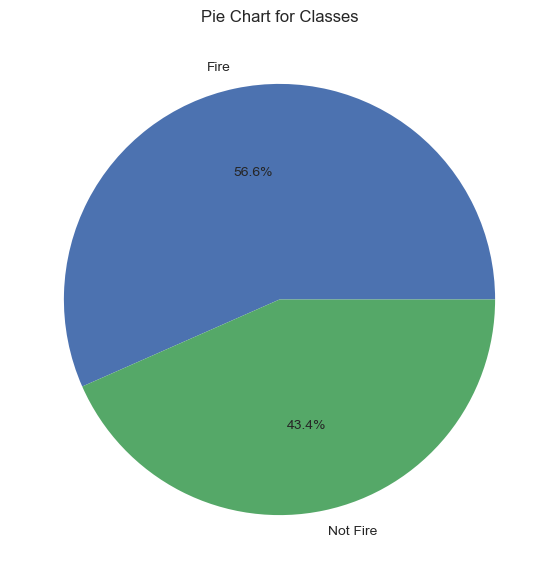

In [111]:
# Pie chart-এ দেখানোর জন্য লেবেল তৈরি করা হচ্ছে
Classlabels = ['Fire', 'Not Fire']

# Figure এর আকার নির্ধারণ করা হচ্ছে (চওড়া 12 ইঞ্চি, লম্বা 7 ইঞ্চি)
plt.figure(figsize=(12, 7))

# Pie chart আঁকা হচ্ছে
# - percentage: প্রতিটি অংশের শতাংশ মানের জন্য
# - labels: প্রতিটি ভাগের নাম (Fire / Not Fire)
# - autopct: প্রতিটি ভাগে শতাংশ কত তা দেখানোর ফরম্যাট ('%1.1f%%' → যেমন: 45.0%)
plt.pie(percentage, labels=Classlabels, autopct='%1.1f%%')

# Pie chart-এর শিরোনাম সেট করা হচ্ছে
plt.title("Pie Chart for Classes")

# চূড়ান্তভাবে চার্টটি দেখানো হচ্ছে
plt.show()


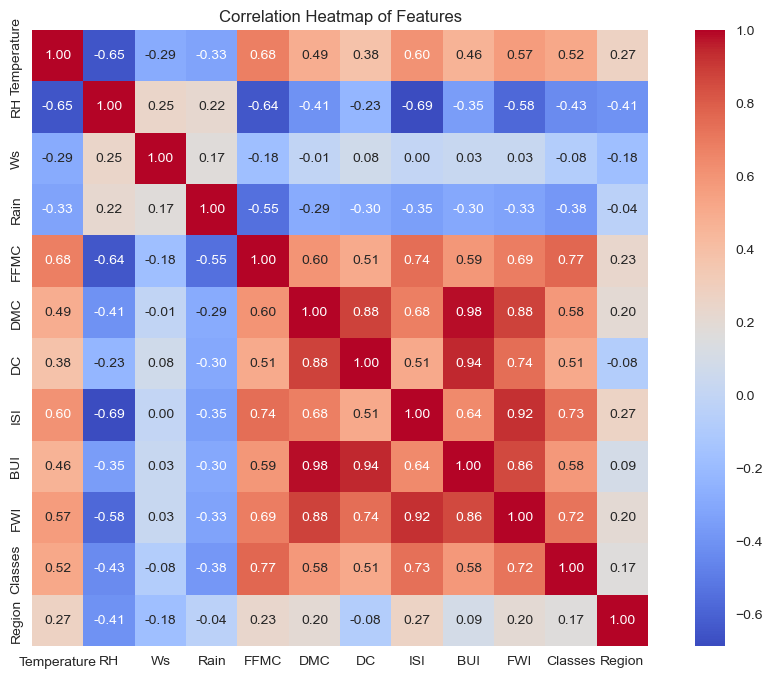

In [118]:
plt.figure(figsize=(12,8))
sns.heatmap(df_copy.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Features")
plt.show()


📌 Heatmap দেখে কী বোঝা যাবে?
দেখা যায়	কী বোঝায়
FFMC এবং ISI এর মধ্যে 0.8+	এরা শক্তিশালীভাবে সম্পর্কিত
RH এবং FFMC এর মধ্যে -0.6	একটার মান বাড়লে আরেকটা কমে
Temperature এবং DC এর সম্পর্ক	তাপমাত্রা শুষ্কতা বাড়ায় কিনা বোঝা যাবে
Classes এর সাথে feature-এর সম্পর্ক	কোন ফিচার আগুন ভবিষ্যদ্বাণীতে গুরুত্বপূর্ণ হতে পারে

এই চিত্রটি একটি "করিলেশন হিটম্যাপ" যা বিভিন্ন বৈশিষ্ট্য (ফিচার) এর মধ্যে সম্পর্ক (করিলেশন) দেখায়। করিলেশন মান -১ থেকে ১ পর্যন্ত হতে পারে:

- **১** এর কাছাকাছি মান হলে এটি একটি শক্তিশালী ধনাত্মক সম্পর্ক নির্দেশ করে (একটি বাড়লে অন্যটিও বাড়ে)।
- **-১** এর কাছাকাছি মান হলে এটি একটি শক্তিশালী ঋণাত্মক সম্পর্ক নির্দেশ করে (একটি বাড়লে অন্যটি কমে)।
- **০** এর কাছাকাছি মান হলে এটি দুর্বল বা কোন সম্পর্ক নেই তা নির্দেশ করে।

এই টেবিলে প্রতিটি সারি এবং কলামে বিভিন্ন বৈশিষ্ট্যের নাম দেওয়া আছে, যেমন:  
- **RH** (আপেক্ষিক আর্দ্রতা), **Temperature** (তাপমাত্রা), **Ws** (বাতাসের গতি), **Rain** (বৃষ্টিপাত), **FFMC**, **DMC**, **ISI**, **BUI**, **FWI** (আগুনের ঝুঁকি সূচক), **Region** (অঞ্চল), **Classes** (আগুনের শ্রেণী)।

### কিছু গুরুত্বপূর্ণ সম্পর্ক:
১. **তাপমাত্রা (Temperature)** এবং **আপেক্ষিক আর্দ্রতা (RH)** এর মধ্যে করিলেশন **-০.৬৫**, অর্থাৎ তাপমাত্রা বাড়লে আর্দ্রতা কমে এবং বিপরীতক্রমে।  
২. **FFMC** এবং **DMC** এর মধ্যে করিলেশন **০.৬০**, অর্থাৎ এদের মধ্যে ধনাত্মক সম্পর্ক রয়েছে।  
৩. **DMC** এবং **BUI** এর মধ্যে করিলেশন **০.৯৮**, যা একটি অত্যন্ত শক্তিশালী ধনাত্মক সম্পর্ক নির্দেশ করে।  
৪. **Rain** (বৃষ্টিপাত) অন্যান্য অনেক বৈশিষ্ট্যের সাথে দুর্বল সম্পর্ক দেখায় (মান ০ এর কাছাকাছি)।

### লেজেন্ড (Legend):
- **FWI** (Fire Weather Index) এবং **Classes** আগুনের ঝুঁকি নির্দেশ করে, যা অন্যান্য ফিচারের সাথে মধ্যম থেকে শক্তিশালী সম্পর্ক দেখায়।

এই হিটম্যাপ ডেটা বিশ্লেষণে সাহায্য করে, যেমন কোন ফিচারগুলি একে অপরের সাথে সম্পর্কিত বা কোনগুলি মডেল তৈরির সময় গুরুত্বপূর্ণ হতে পারে।

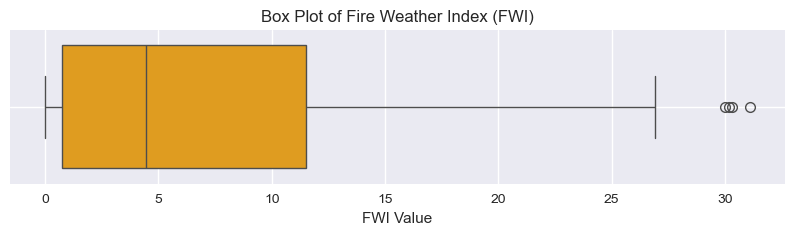

In [121]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_copy['FWI'], color='orange')
plt.title('Box Plot of Fire Weather Index (FWI)')
plt.xlabel('FWI Value')
plt.grid(True)
plt.show()





## 📦 কি হচ্ছে এখানে?

### 📌 `sns.boxplot(...)`

* এটি **সিঙ্গেল ফিচারের distribution এবং outliers** দেখানোর জন্য ব্যবহার হয়।
* এক নজরে একটি ভ্যারিয়েবলের মধ্যে:

  * **মিডিয়ান (মাঝের মান)**
  * **Q1, Q3 (25th ও 75th percentile)**
  * **IQR (Inter Quartile Range)**
  * **Outliers (বাইরের ডেটা)**

---

## 📊 Box Plot ব্যাখ্যা (FWI এর জন্য)

| অংশ                            | অর্থ                                                 |
| ------------------------------ | ---------------------------------------------------- |
| **Middle line (box এর ভেতরে)** | এটি হলো **মিডিয়ান (50th percentile)** — ডেটার মাঝখান |
| **Box এর নিচের দিক**           | 25th percentile (Q1) — নিচের ২৫% ডেটা                |
| **Box এর উপরদিক**              | 75th percentile (Q3) — উপরের ২৫% ডেটা বাদে           |
| **Box এর উচ্চতা**              | IQR = Q3 - Q1 → ডেটার মূল বিস্তৃতি                   |
| **Lines (whiskers)**           | সাধারণত Q1 − 1.5×IQR থেকে Q3 + 1.5×IQR পর্যন্ত       |
| **Dots বা Points বাইরে**       | এগুলো **Outliers** — অস্বাভাবিক ডেটা পয়েন্ট          |

---

### 🔍 এই Box Plot দিয়ে কী বোঝা যাবে?

* FWI-এর **গড় আগুন সূচক** কত?
* ডেটা কী **skewed**?
* FWI-এর মধ্যে **outlier** আছে কিনা (যেমন: খুব কম বা খুব বেশি মান)
* আগুনের শর্তে কোন রেঞ্জে FWI বেশি দেখা যায়

---



🔚 **উপসংহার**:
Box plot হচ্ছে powerful visualization — বিশেষ করে **outlier** detect করতে ও **data distribution** বুঝতে।




In [132]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

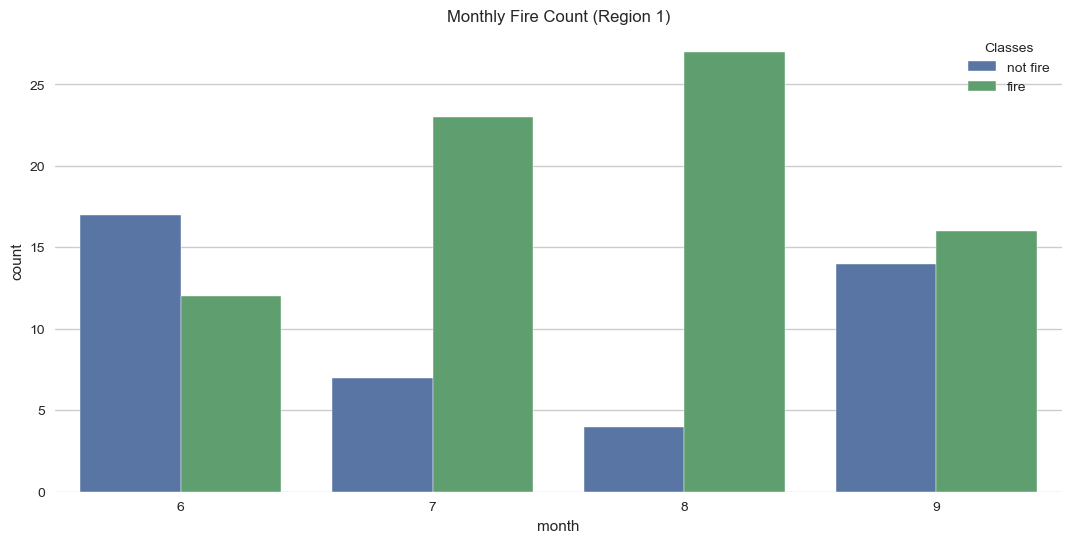

In [134]:
## Monthly fire Analysis
dftemp = df[df['Region'] == 1]  # ✅ Region 1 অনুযায়ী ডেটা ফিল্টার
plt.subplots(figsize=(13,6))   # ✅ ফিগার সাইজ
sns.set_style('whitegrid')     # ✅ স্টাইল 'whitegrid' (case sensitive)
sns.countplot(x='month', hue='Classes', data=dftemp)  # ✅ ঠিক ডেটা ব্যবহৃত
plt.title("Monthly Fire Count (Region 1)")  # ✅ শিরোনাম
plt.show()


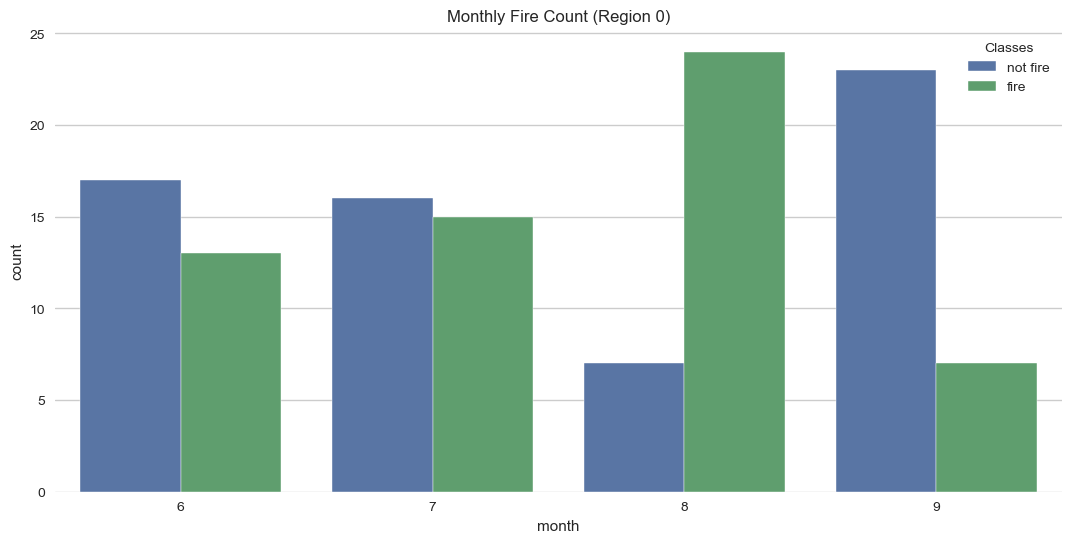

In [138]:
## Monthly fire Analysis
dftemp = df[df['Region'] == 0]  # ✅ Region 1 অনুযায়ী ডেটা ফিল্টার
plt.subplots(figsize=(13,6))   # ✅ ফিগার সাইজ
sns.set_style('whitegrid')     # ✅ স্টাইল 'whitegrid' (case sensitive)
sns.countplot(x='month', hue='Classes', data=dftemp)  # ✅ ঠিক ডেটা ব্যবহৃত
plt.title("Monthly Fire Count (Region 0)")  # ✅ শিরোনাম
plt.show()


# Model Training 

In [141]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [143]:
## Droping month ,day and year
df.drop(['day','month','year'], axis=1 , inplace=True )

In [145]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


month ,day and year deleted

In [150]:
df['Classes'].value_counts()

Classes
fire        137
not fire    105
Name: count, dtype: int64

In [152]:
df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0,1)

In [162]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [164]:
# ✅ Independent and Dependent features
X = df.drop('FWI', axis=1)  # Independent features (input variables)
y = df['FWI']               # Dependent feature (target variable)

In [160]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [166]:
from sklearn.model_selection import train_test_split

# ✅ Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ চেক করে দেখো
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (193, 11)
Testing Features Shape: (49, 11)
Training Labels Shape: (193,)
Testing Labels Shape: (49,)


🔍 ব্যাখ্যা বাংলায়:
অংশ	ব্যাখ্যা
test_size=0.2	২০% ডেটা থাকবে টেস্টিং-এ, ৮০% ট্রেইনিং-এ
random_state=42	র‍্যান্ডম ভাগ যেন বারবার একই হয়
X_train, y_train	মডেল শেখানোর জন্য ব্যবহৃত ইনপুট ও টার্গেট
X_test, y_test	মডেল কেমন পারফর্ম করছে সেটা যাচাই করার জন্য

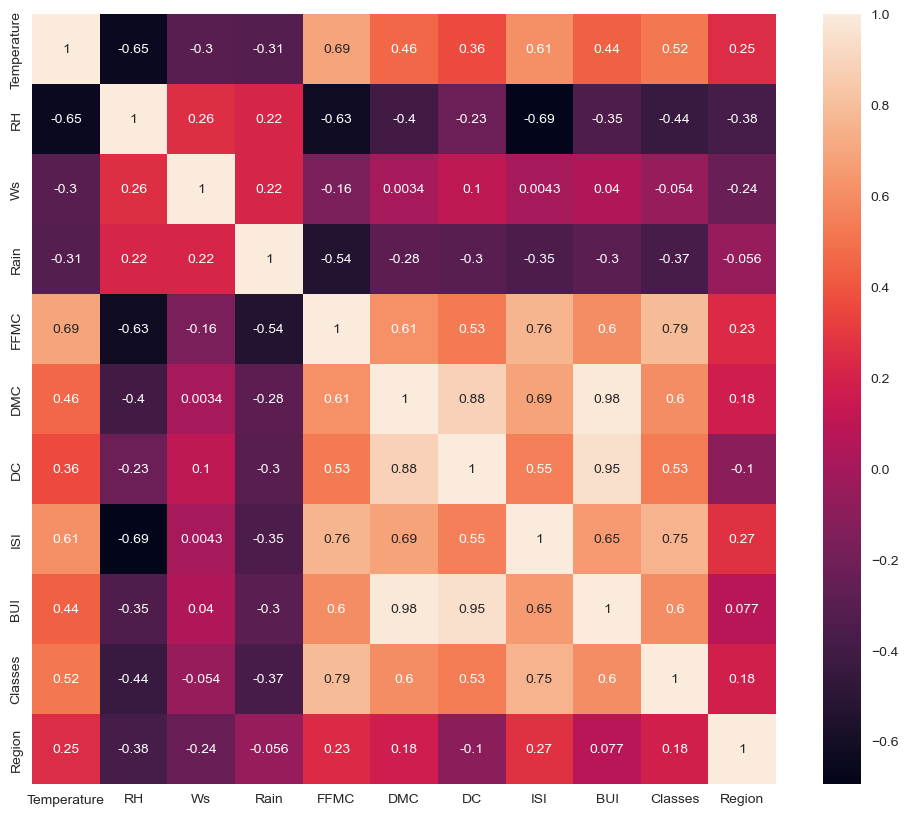

In [169]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr , annot =True)
plt.show()

In [171]:
def correlation(dataset, threshold):
    col_corr = set()  # ✅ যেসব ফিচার threshold-এর বেশি related, তাদের নাম রাখার জন্য সেট
    corr_matrix = dataset.corr()  # ✅ সব numeric feature-এর মধ্যে correlation matrix তৈরি করা
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):  # ✅ প্রতিটি ফিচার pair একবার করে নেওয়া
            if abs(corr_matrix.iloc[i, j]) > threshold:  # ✅ যদি correlation বেশি হয়
                colname = corr_matrix.columns[i]
                col_corr.add(colname)  # ✅ highly correlated কলামের নাম সেভ করা
    
    return col_corr  # ✅ সেট আকারে correlated ফিচারের নাম return দেয়


In [173]:
## threshold -- Domain expertise
corr_features=correlation(X_train,0.85)
corr_features


{'BUI', 'DC'}

In [175]:
## Drop features when correlation is more than 0.85
X_train.drop(corr_features , axis = 1 , inplace = True)
X_test.drop(corr_features , axis = 1 , inplace = True)


In [177]:
X_train.shape , X_test.shape

((193, 9), (49, 9))

## feature Sacling or Standardization

In [180]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-3.12212264e-01,  1.11790557e-01, -1.82343069e-01,
        -3.82958525e-01,  6.26945130e-01, -6.47374376e-02,
         2.11081407e-01,  8.87151079e-01, -1.00519484e+00],
       [ 2.28208964e-01, -5.60345814e-01, -9.07955692e-01,
        -3.82958525e-01,  7.32708556e-01, -3.96376941e-01,
         3.77653241e-01,  8.87151079e-01, -1.00519484e+00],
       [ 2.28208964e-01, -9.63627636e-01,  1.80463243e-01,
        -3.82958525e-01,  6.90403185e-01, -5.50627872e-01,
         4.72837146e-01,  8.87151079e-01,  9.94832007e-01],
       [ 7.68630192e-01, -6.27559451e-01,  5.43269555e-01,
        -1.42206097e-01,  1.68636951e-01,  4.36578090e-01,
        -5.02797883e-01,  8.87151079e-01,  9.94832007e-01],
       [-5.82422878e-01,  1.79004194e-01, -5.45149380e-01,
        -3.82958525e-01,  5.35283494e-01,  7.40884008e-02,
        -7.44703093e-02,  8.87151079e-01,  9.94832007e-01],
       [ 7.68630192e-01,  2.46217831e-01, -1.82343069e-01,
        -3.34808039e-01,  3.44909328e-01,  1.362083

## Box plots to understand effect of Standard Scaler

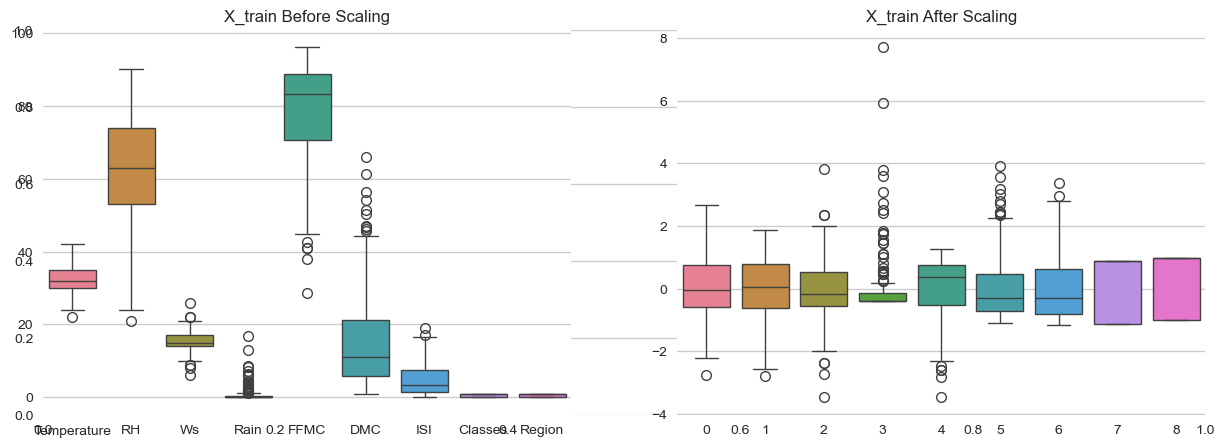

In [182]:
 plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')

plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')
plt.show()


In [ ]:
# Linear Regression

MAE : 0.5305466701106825
R2 score : 0.982465500980637


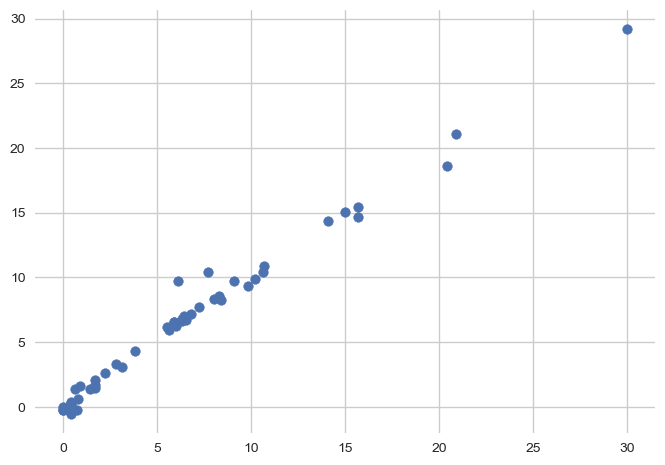

In [185]:
# লাইব্রেরি ইম্পোর্ট করি
from sklearn.linear_model import LinearRegression          # লিনিয়ার রিগ্রেশন মডেল
from sklearn.preprocessing import StandardScaler           # ফিচার স্কেল-আপের জন্য
from sklearn.metrics import mean_absolute_error, r2_score  # মূল্যায়ন মেট্রিক্স

# ------------------------- ডেটা প্রিপ্রসেসিং -------------------------

scaler = StandardScaler()          # স্কেলার অবজেক্ট তৈরি

# 🔹 ট্রেনিং ডেটা স্কেল করি (স্কেলার এখানে fit ও transform দুটোই করবে)
X_train_scaled = scaler.fit_transform(X_train)

# 🔹 টেস্ট ডেটা স্কেল করি (একই স্কেলার দিয়ে শুধুমাত্র transform)
X_test_scaled  = scaler.transform(X_test)

# ------------------------- মডেল ট্রেনিং ও প্রেডিকশন --------------------

linreg = LinearRegression()        # লিনিয়ার রিগ্রেশন মডেল অবজেক্ট বানাই
linreg.fit(X_train_scaled, y_train)  # মডেলকে ট্রেনিং ডেটায় ফিট করি

y_pred = linreg.predict(X_test_scaled)  # টেস্ট ডেটায় প্রেডিকশন করি

# ------------------------- মডেল মূল্যায়ন -----------------------------

mae   = mean_absolute_error(y_test, y_pred)  # MAE (গড় এক absolut ভুল)
r2    = r2_score(y_test, y_pred)             # R² স্কোর (ব্যাখ্যাযোগ্য ভেরিয়েন্স)

# ------------------------- ফলাফল প্রিন্ট ------------------------------

print("MAE :", mae)
print("R2 score :", r2)
plt.scatter(y_test , y_pred)
plt.show()


##  lasso regression

MAE : 1.055488790970202
R2 score : 0.9496927236027399


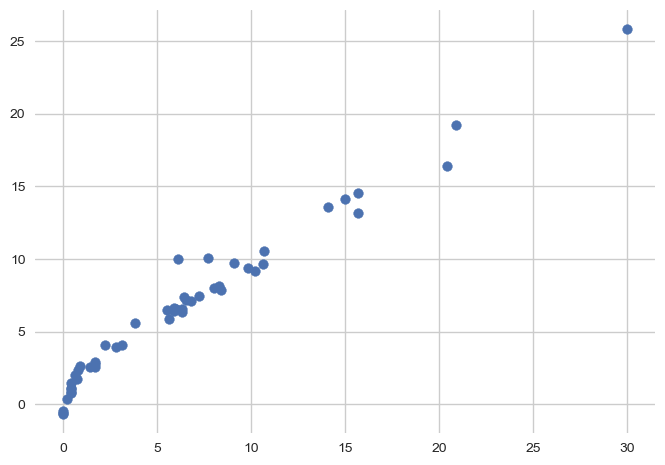

In [188]:
# লাইব্রেরি ইম্পোর্ট করি
from sklearn.linear_model import Lasso        # Lasso মডেল
from sklearn.preprocessing import StandardScaler           # ফিচার স্কেল-আপের জন্য
from sklearn.metrics import mean_absolute_error, r2_score  # মূল্যায়ন মেট্রিক্স

# ------------------------- ডেটা প্রিপ্রসেসিং -------------------------

scaler = StandardScaler()          # স্কেলার অবজেক্ট তৈরি

# 🔹 ট্রেনিং ডেটা স্কেল করি (স্কেলার এখানে fit ও transform দুটোই করবে)
X_train_scaled = scaler.fit_transform(X_train)

# 🔹 টেস্ট ডেটা স্কেল করি (একই স্কেলার দিয়ে শুধুমাত্র transform)
X_test_scaled  = scaler.transform(X_test)

# ------------------------- মডেল ট্রেনিং ও প্রেডিকশন --------------------

Lasso = Lasso()       # Lasso regression মডেল অবজেক্ট বানাই
Lasso.fit(X_train_scaled, y_train)  # মডেলকে ট্রেনিং ডেটায় ফিট করি

y_pred = Lasso.predict(X_test_scaled)  # টেস্ট ডেটায় প্রেডিকশন করি

# ------------------------- মডেল মূল্যায়ন -----------------------------

mae   = mean_absolute_error(y_test, y_pred)  # MAE (গড় এক absolut ভুল)
r2    = r2_score(y_test, y_pred)             # R² স্কোর (ব্যাখ্যাযোগ্য ভেরিয়েন্স)

# ------------------------- ফলাফল প্রিন্ট ------------------------------

print("MAE :", mae)
print("R2 score :", r2)
plt.scatter(y_test , y_pred)
plt.show()


## Ridge Regression model

MAE : 0.5541322676246586
R2 score : 0.9817118864272071


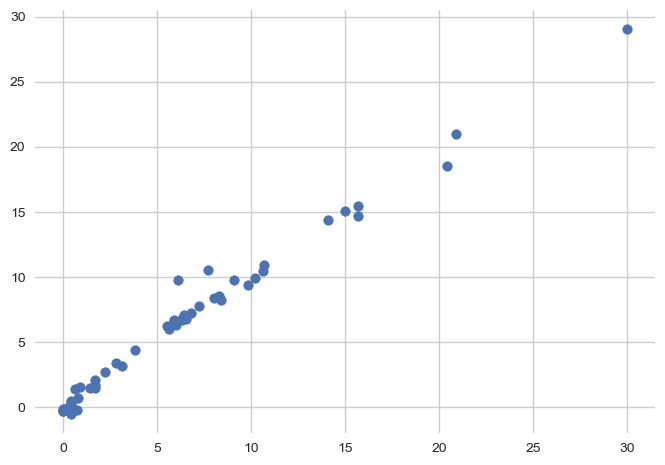

In [191]:
# লাইব্রেরি ইম্পোর্ট করি
from sklearn.linear_model import Ridge       # Lasso মডেল
from sklearn.preprocessing import StandardScaler           # ফিচার স্কেল-আপের জন্য
from sklearn.metrics import mean_absolute_error, r2_score  # মূল্যায়ন মেট্রিক্স

# ------------------------- ডেটা প্রিপ্রসেসিং -------------------------

scaler = StandardScaler()          # স্কেলার অবজেক্ট তৈরি

# 🔹 ট্রেনিং ডেটা স্কেল করি (স্কেলার এখানে fit ও transform দুটোই করবে)
X_train_scaled = scaler.fit_transform(X_train)

# 🔹 টেস্ট ডেটা স্কেল করি (একই স্কেলার দিয়ে শুধুমাত্র transform)
X_test_scaled  = scaler.transform(X_test)

# ------------------------- মডেল ট্রেনিং ও প্রেডিকশন --------------------

Ridge = Ridge()       # Lasso regression মডেল অবজেক্ট বানাই
Ridge.fit(X_train_scaled, y_train)  # মডেলকে ট্রেনিং ডেটায় ফিট করি

y_pred = Ridge.predict(X_test_scaled)  # টেস্ট ডেটায় প্রেডিকশন করি

# ------------------------- মডেল মূল্যায়ন -----------------------------

mae   = mean_absolute_error(y_test, y_pred)  # MAE (গড় এক absolut ভুল)
r2    = r2_score(y_test, y_pred)             # R² স্কোর (ব্যাখ্যাযোগ্য ভেরিয়েন্স)

# ------------------------- ফলাফল প্রিন্ট ------------------------------

print("MAE :", mae)
print("R2 score :", r2)
plt.scatter(y_test , y_pred)
plt.show()


## Elastic net regression

MAE : 1.7852089888336107
R2 score : 0.8734584757078916


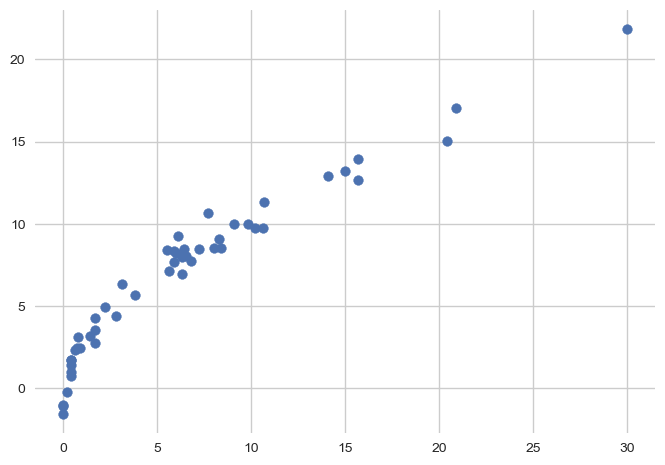

In [194]:
# লাইব্রেরি ইম্পোর্ট করি
from sklearn.linear_model import ElasticNet       # Elastic Net মডেল
from sklearn.preprocessing import StandardScaler           # ফিচার স্কেল-আপের জন্য
from sklearn.metrics import mean_absolute_error, r2_score  # মূল্যায়ন মেট্রিক্স

# ------------------------- ডেটা প্রিপ্রসেসিং -------------------------

scaler = StandardScaler()          # স্কেলার অবজেক্ট তৈরি

# 🔹 ট্রেনিং ডেটা স্কেল করি (স্কেলার এখানে fit ও transform দুটোই করবে)
X_train_scaled = scaler.fit_transform(X_train)

# 🔹 টেস্ট ডেটা স্কেল করি (একই স্কেলার দিয়ে শুধুমাত্র transform)
X_test_scaled  = scaler.transform(X_test)

# ------------------------- মডেল ট্রেনিং ও প্রেডিকশন --------------------

Elastic = ElasticNet()       # ElasticNet মডেল অবজেক্ট বানাই.
Elastic.fit(X_train_scaled, y_train) # মডেলকে ট্রেনিং ডেটায় ফিট করি

y_pred = Elastic.predict(X_test_scaled)  # টেস্ট ডেটায় প্রেডিকশন করি

# ------------------------- মডেল মূল্যায়ন -----------------------------

mae   = mean_absolute_error(y_test, y_pred)  # MAE (গড় এক absolut ভুল)
r2    = r2_score(y_test, y_pred)             # R² স্কোর (ব্যাখ্যাযোগ্য ভেরিয়েন্স)

# ------------------------- ফলাফল প্রিন্ট ------------------------------

print("MAE :", mae)
print("R2 score :", r2)
plt.scatter(y_test , y_pred)
plt.show()


# Cross validation Lasso

In [197]:
from sklearn.linear_model import LassoCV
lassocv= LassoCV(cv=5)
lassocv.fit(X_train_scaled , y_train )

LassoCV(cv=5)

MAE is :  0.6037968115340997
R2 score is :  0.9798748017369487


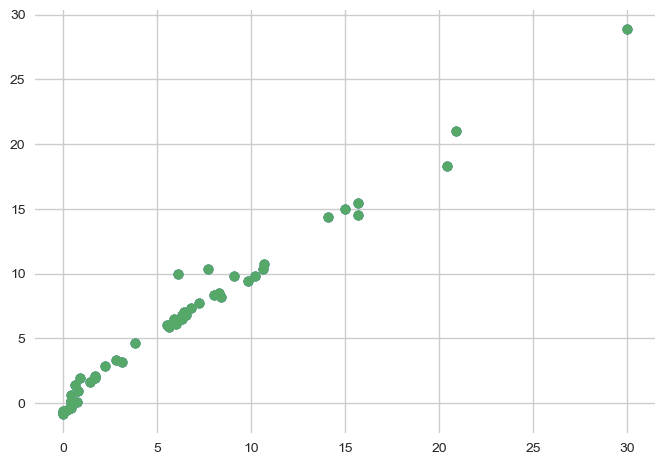

In [201]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test , y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test , y_pred)
print("MAE is : ",mae)
print("R2 score is : ",score)
plt.show()

## Using RidgeCV and ElasticNetCV

In [204]:
from sklearn.linear_model import RidgeCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt


## RidgeCV ব্যবহার করে Train, Predict ও Evaluate

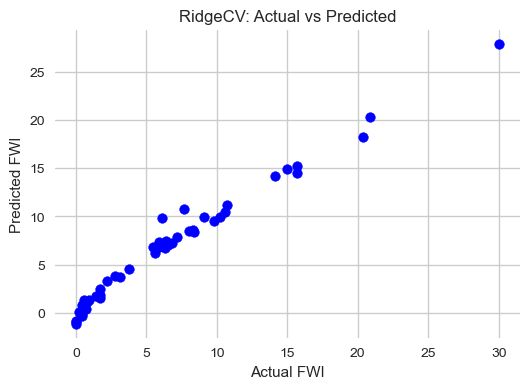

🔷 RidgeCV Results
MAE : 0.7719102991998403
R²  : 0.9721734462575803


In [206]:
# RidgeCV Model
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred_ridge = ridgecv.predict(X_test_scaled)

# Plot and Metrics
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_ridge, color='blue')
plt.title("RidgeCV: Actual vs Predicted")
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.grid(True)
plt.show()

# Performance
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("🔷 RidgeCV Results")
print("MAE :", mae_ridge)
print("R²  :", r2_ridge)


##  ElasticNetCV ব্যবহার করে Train, Predict ও Evaluate

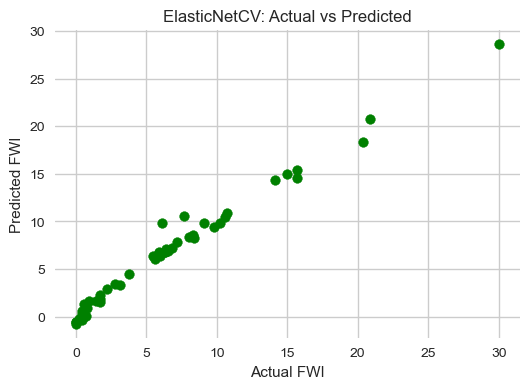

🟢 ElasticNetCV Results
MAE : 0.6281526372468877
R²  : 0.9793204021221839


In [210]:
# ElasticNetCV Model
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled, y_train)
y_pred_enet = elasticcv.predict(X_test_scaled)

# Plot and Metrics
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_enet, color='green')
plt.title("ElasticNetCV: Actual vs Predicted")
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.grid(True)
plt.show()

# Performance
mae_enet = mean_absolute_error(y_test, y_pred_enet)
r2_enet = r2_score(y_test, y_pred_enet)
print("🟢 ElasticNetCV Results")
print("MAE :", mae_enet)
print("R²  :", r2_enet)


# ✅ কোনটা ভালো?
তুমি এখন তিনটি মডেল (LassoCV, RidgeCV, ElasticNetCV) এর ফলাফল compare করতে পারো:

Model	MAE	R² Score
LassoCV	...	...
RidgeCV	...	...
ElasticNetCV	...	...

# ✅ যেটার R² বেশি ও MAE কম, সেটাই বেশি accurate।


📊 Model Performance Summary:

          Model       MAE  R2 Score
0       LassoCV  0.603797  0.979875
1       RidgeCV  0.771910  0.972173
2  ElasticNetCV  0.628153  0.979320


C:\Users\ashra\AppData\Local\Temp\ipykernel_15508\3968217969.py:67: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ashra\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


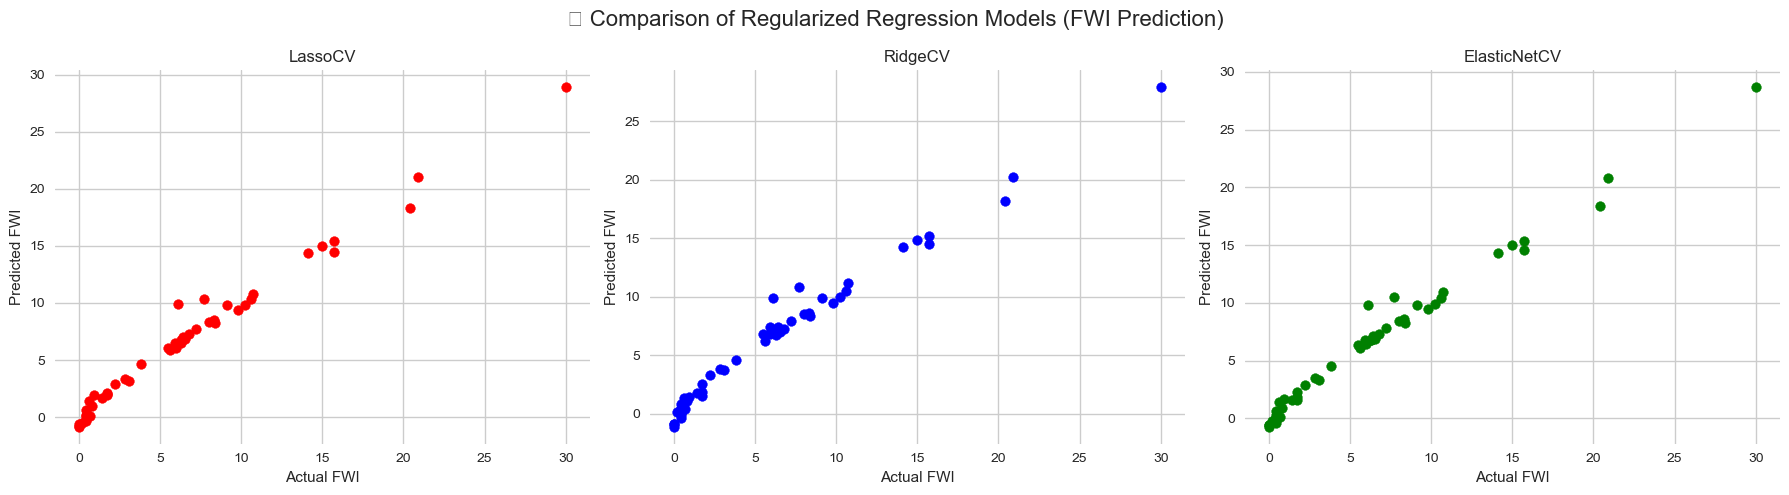

In [215]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# ===== 1. Train Models =====
lasso = LassoCV(cv=5)
ridge = RidgeCV(cv=5)
elastic = ElasticNetCV(cv=5)

lasso.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
elastic.fit(X_train_scaled, y_train)

# ===== 2. Predict =====
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_enet = elastic.predict(X_test_scaled)

# ===== 3. Evaluation =====
models = ['LassoCV', 'RidgeCV', 'ElasticNetCV']
maes = [
    mean_absolute_error(y_test, y_pred_lasso),
    mean_absolute_error(y_test, y_pred_ridge),
    mean_absolute_error(y_test, y_pred_enet)
]
r2s = [
    r2_score(y_test, y_pred_lasso),
    r2_score(y_test, y_pred_ridge),
    r2_score(y_test, y_pred_enet)
]

# ===== 4. Summary Table =====
results = pd.DataFrame({
    'Model': models,
    'MAE': maes,
    'R2 Score': r2s
})
print("\n📊 Model Performance Summary:\n")
print(results)

# ===== 5. Side-by-side Plot =====
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lasso, color='red')
plt.title("LassoCV")
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge, color='blue')
plt.title("RidgeCV")
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_enet, color='green')
plt.title("ElasticNetCV")
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.grid(True)

plt.suptitle("🔥 Comparison of Regularized Regression Models (FWI Prediction)", fontsize=16)
plt.tight_layout()
plt.show()


## Pickle the machine learning models , preprocessing model standardscaler

In [219]:
scaler

StandardScaler()

In [221]:
elasticcv

ElasticNetCV(cv=5)

In [223]:
import pickle
pickle.dump(scaler , open('scaler.pkl','wb'))
pickle.dump(elasticcv, open('elasticcv.pkl','wb'))